CH.2 Pytorch의 기본 기능
=====================

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2.2 Tensor
----------

In [3]:
# 0th rank tensor
r0 = torch.tensor(1.0).float() # float()은 dtype을 float32로 변환. 이 과정이 없으면 dtype이 float64로 남음
print(type(r0))
print(r0.dtype)
print(r0.shape)
print(r0.data)

<class 'torch.Tensor'>
torch.float32
torch.Size([])
tensor(1.)


In [4]:
# 1st rank tensor
r1_np = np.array([1,2,3,4])
r1 = torch.tensor(r1_np).float()
print(r1.dtype)
print(r1.shape)
print(r1.data)

torch.float32
torch.Size([4])
tensor([1., 2., 3., 4.])


In [5]:
# 2nd rank tensor
r2_np = np.array([[1,5,6],[4,3,2]])
print(r2_np.shape)
r2 = torch.tensor(r2_np).float()
print(r2.shape)
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [6]:
# 3rd rank tensor
torch.manual_seed(123) # random seed init
r3 = torch.randn((3,2,2)) # normal distribution
print(r3.shape)
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [7]:
# 4th rank tensor
r4 = torch.ones((2,3,2,2))
print(r4.shape)
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


In [8]:
# change to integer tensor
r5 = r1.long()
print(r5.dtype)
print(r5)

torch.int64
tensor([1, 2, 3, 4])


In [9]:
# reshape
r6 = r3.view(3,-1) # change 3rd rank tensor to 2nd rank tensor
print(r6.shape)
print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [10]:
# reshape
r7 = r3.view(-1) # change 3rd rank to 1st rank
print(r7.shape)
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [11]:
# Others
item = r0.item() # Only for single element tensor
print(type(item))
print(item)

<class 'float'>
1.0


In [12]:
# Others
print(r2)
print(r2.max())

print(torch.max(r2,1)) # 0 for row & 1 for column

print(torch.max(r2,1)[1])

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)
torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))
tensor([2, 0])


In [13]:
# change to numpy variable
r2_np = r2.data.numpy()
print(type(r2_np))
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


2.3 Calculation of Gradient for Quadratic Function
------------------------

In [14]:
# Variable Setting
x_np = np.arange(-2,2.1,0.25)
print(x_np)
x = torch.tensor(x_np, requires_grad=True, dtype = torch.float32)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


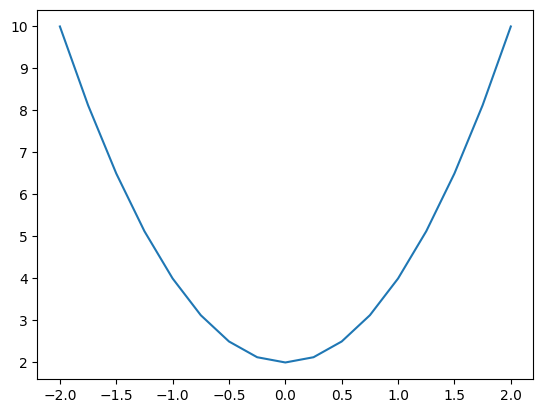

In [15]:
# Tensor Variable Calculation
y = 2*x**2 + 2
print(y)

plt.plot(x.data,y.data)
plt.show()

In [16]:
z = y.sum()

In [2]:
from torchviz import make_dot

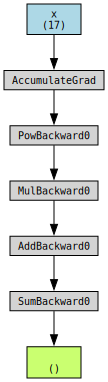

In [18]:
# Define by Run
g = make_dot(z, params = {'x' : x})
display(g) # calculation graph

In [19]:
# Gradient Calculate
z.backward()

In [20]:
# get the gradient
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


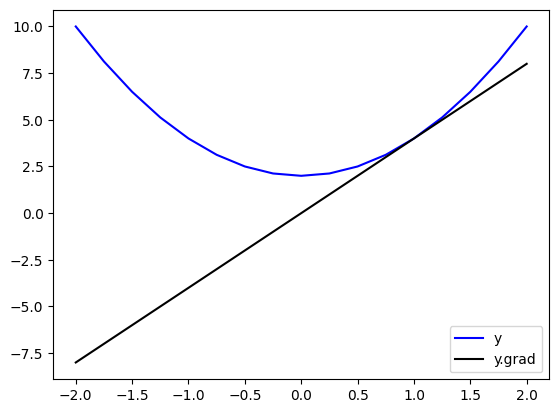

In [21]:
plt.plot(x.data,y.data, c = 'b',label = 'y')
plt.plot(x.data,x.grad.data, c = 'k',label = 'y.grad')
plt.legend()
plt.show()

In [22]:
# Initialize the Graident

# Case1 : W/O Init
y = 2*x**2 + 2
z = y.sum()
z.backward()
print(x.grad) # addition to all precedent gradient -> allow to design more complex ML model 

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


In [23]:
x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


2.5 Sigmoid Function Gradient Calculation
-------------

In [24]:
sigmoid = torch.nn.Sigmoid()

In [25]:
y = sigmoid(x)

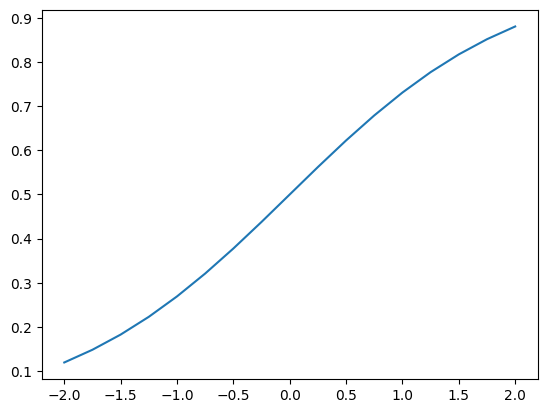

In [26]:
plt.plot(x.data, y.data)
plt.show()

In [27]:
z = y.sum()

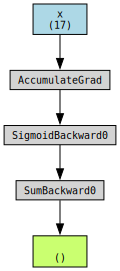

In [28]:
g = make_dot(z, params = {'x' : x})
display(g)

In [29]:
z.backward()
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


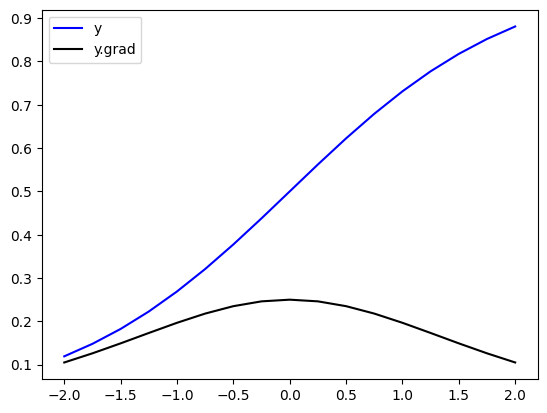

In [30]:
plt.plot(x.data, y.data, c = 'b', label = 'y')
plt.plot(x.data, x.grad.data, c= 'k', label = 'y.grad')
plt.legend()
plt.show()

CH.3 처음 시작하는 머신러닝
======================

In [31]:
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

In [32]:
x = sampleData1[:,0]
y = sampleData1[:,1]

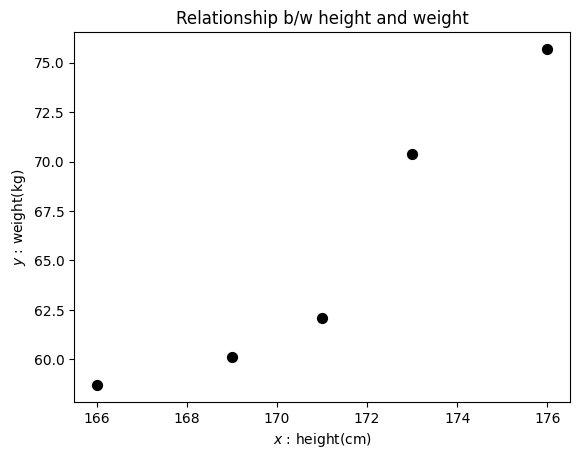

In [33]:
plt.scatter(x,y, c = 'k', s = 50)
plt.xlabel('$x$ : height(cm)')
plt.ylabel('$y$ : weight(kg)')
plt.title('Relationship b/w height and weight')
plt.show()

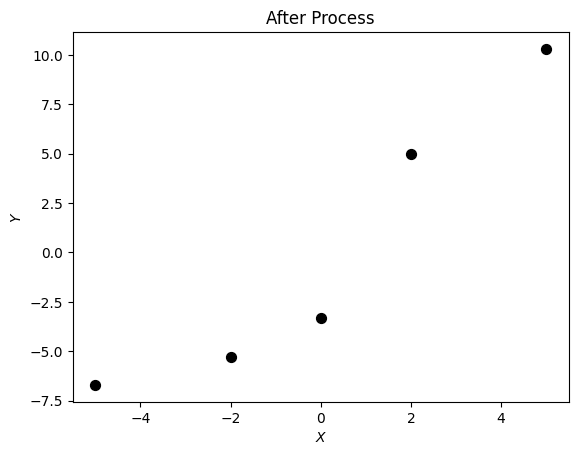

In [34]:
X = x - x.mean()
Y = y - y.mean()

plt.scatter(X,Y, c = 'k', s = 50)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("After Process")
plt.show()

In [35]:
# Prediction

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [36]:
W = torch.tensor(1.0,requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [37]:
def pred(X):
    return W*X + B

In [38]:
Yp = pred(X)
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


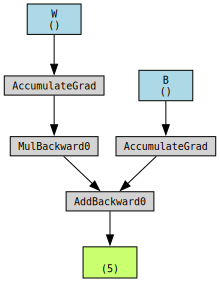

In [39]:
# Display Calculation Graph
params = {'W' : W, 'B' : B}
g = make_dot(Yp, params)
display(g)

In [40]:
# Loss Calculation

def mse(Yp,Y):
    loss = ((Yp - Y)**2).mean()
    return loss

In [41]:
loss  = mse(Yp, Y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


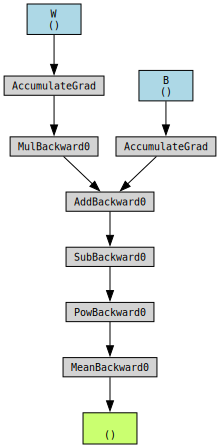

In [42]:
# Display Calculation Graph
params = {'W' : W, 'B' : B}
g = make_dot(loss, params)
display(g)

In [43]:
# Gradient Calculation

loss.backward()
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [44]:
# Update Parameters
lr = 0.001 # learning rate
W -= lr*W.grad # error : W.grad will be ambiguous if this line run 
B -= lr*B.grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [45]:
with torch.no_grad(): # temporarirly stop making new calculation graph
    W -= lr*W.grad
    B -= lr*B.grad

In [46]:
W.grad.zero_()
B.grad.zero_()

tensor(0.)

In [47]:
# Repeat

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

lr = 0.001

num_epoch = 500

history = np.zeros((0,2))

In [48]:
for epoch in range(num_epoch):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()
    
    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad
        
        W.grad.zero_()
        B.grad.zero_()
    
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history,item))
        print(f'epcoh = {epoch} loss = {loss:.4f}')

epcoh = 0 loss = 13.3520
epcoh = 10 loss = 10.3855
epcoh = 20 loss = 8.5173
epcoh = 30 loss = 7.3364
epcoh = 40 loss = 6.5858
epcoh = 50 loss = 6.1047
epcoh = 60 loss = 5.7927
epcoh = 70 loss = 5.5868
epcoh = 80 loss = 5.4476
epcoh = 90 loss = 5.3507
epcoh = 100 loss = 5.2805
epcoh = 110 loss = 5.2275
epcoh = 120 loss = 5.1855
epcoh = 130 loss = 5.1507
epcoh = 140 loss = 5.1208
epcoh = 150 loss = 5.0943
epcoh = 160 loss = 5.0703
epcoh = 170 loss = 5.0480
epcoh = 180 loss = 5.0271
epcoh = 190 loss = 5.0074
epcoh = 200 loss = 4.9887
epcoh = 210 loss = 4.9708
epcoh = 220 loss = 4.9537
epcoh = 230 loss = 4.9373
epcoh = 240 loss = 4.9217
epcoh = 250 loss = 4.9066
epcoh = 260 loss = 4.8922
epcoh = 270 loss = 4.8783
epcoh = 280 loss = 4.8650
epcoh = 290 loss = 4.8522
epcoh = 300 loss = 4.8399
epcoh = 310 loss = 4.8281
epcoh = 320 loss = 4.8167
epcoh = 330 loss = 4.8058
epcoh = 340 loss = 4.7953
epcoh = 350 loss = 4.7853
epcoh = 360 loss = 4.7756
epcoh = 370 loss = 4.7663
epcoh = 380 loss = 4.

In [49]:
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

print(f'initial state : loss = {history[0,1]:.4f}')
print(f'final state : loss = {history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
initial state : loss = 13.3520
final state : loss = 4.6796


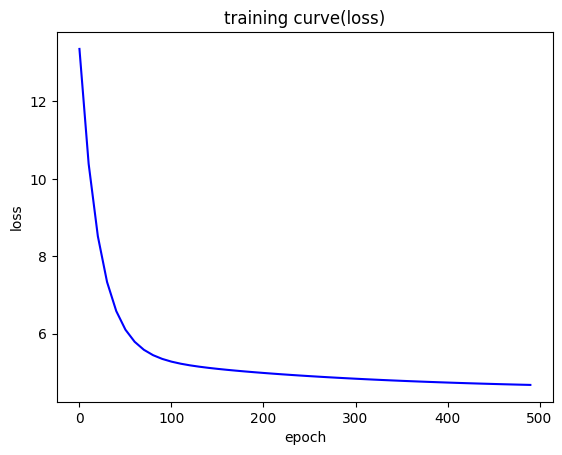

In [50]:
plt.plot(history[:,0],history[:,1],'b')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("training curve(loss)")
plt.show()

In [51]:
# Use Optimzation Function

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epoch = 500

lr = 0.001

import torch.optim as optim
optimizer = optim.SGD([W,B], lr = lr)

history = np.zeros((0,2))

In [52]:
for epoch in range(num_epoch):
    Yp = pred(X)
    loss = mse(Yp,Y)
    loss.backward()
    
    optimizer.step() # update parameter
    optimizer.zero_grad() # init
    
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history,item))
        print(f'epcoh = {epoch} loss = {loss:.4f}')

epcoh = 0 loss = 13.3520
epcoh = 10 loss = 10.3855
epcoh = 20 loss = 8.5173
epcoh = 30 loss = 7.3364
epcoh = 40 loss = 6.5858
epcoh = 50 loss = 6.1047
epcoh = 60 loss = 5.7927
epcoh = 70 loss = 5.5868
epcoh = 80 loss = 5.4476
epcoh = 90 loss = 5.3507
epcoh = 100 loss = 5.2805
epcoh = 110 loss = 5.2275
epcoh = 120 loss = 5.1855
epcoh = 130 loss = 5.1507
epcoh = 140 loss = 5.1208
epcoh = 150 loss = 5.0943
epcoh = 160 loss = 5.0703
epcoh = 170 loss = 5.0480
epcoh = 180 loss = 5.0271
epcoh = 190 loss = 5.0074
epcoh = 200 loss = 4.9887
epcoh = 210 loss = 4.9708
epcoh = 220 loss = 4.9537
epcoh = 230 loss = 4.9373
epcoh = 240 loss = 4.9217
epcoh = 250 loss = 4.9066
epcoh = 260 loss = 4.8922
epcoh = 270 loss = 4.8783
epcoh = 280 loss = 4.8650
epcoh = 290 loss = 4.8522
epcoh = 300 loss = 4.8399
epcoh = 310 loss = 4.8281
epcoh = 320 loss = 4.8167
epcoh = 330 loss = 4.8058
epcoh = 340 loss = 4.7953
epcoh = 350 loss = 4.7853
epcoh = 360 loss = 4.7756
epcoh = 370 loss = 4.7663
epcoh = 380 loss = 4.

In [53]:
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

print(f'initial state : loss = {history[0,1]:.4f}')
print(f'final state : loss = {history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
initial state : loss = 13.3520
final state : loss = 4.6796


In [54]:
# Tuning the Optimization Function

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epoch = 500

lr = 0.001

momentum = 0.9

import torch.optim as optim
optimizer = optim.SGD([W,B], lr = lr, momentum=momentum)

history2 = np.zeros((0,2))


for epoch in range(num_epoch):
    Yp = pred(X)
    loss = mse(Yp,Y)
    loss.backward()
    
    optimizer.step() # update parameter
    optimizer.zero_grad() # init
    
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2,item))
        print(f'epcoh = {epoch} loss = {loss:.4f}')

epcoh = 0 loss = 13.3520
epcoh = 10 loss = 5.7585
epcoh = 20 loss = 5.9541
epcoh = 30 loss = 5.0276
epcoh = 40 loss = 4.8578
epcoh = 50 loss = 4.7052
epcoh = 60 loss = 4.6327
epcoh = 70 loss = 4.5940
epcoh = 80 loss = 4.5698
epcoh = 90 loss = 4.5574
epcoh = 100 loss = 4.5495
epcoh = 110 loss = 4.5452
epcoh = 120 loss = 4.5426
epcoh = 130 loss = 4.5411
epcoh = 140 loss = 4.5403
epcoh = 150 loss = 4.5398
epcoh = 160 loss = 4.5395
epcoh = 170 loss = 4.5393
epcoh = 180 loss = 4.5392
epcoh = 190 loss = 4.5391
epcoh = 200 loss = 4.5391
epcoh = 210 loss = 4.5391
epcoh = 220 loss = 4.5391
epcoh = 230 loss = 4.5390
epcoh = 240 loss = 4.5390
epcoh = 250 loss = 4.5390
epcoh = 260 loss = 4.5390
epcoh = 270 loss = 4.5390
epcoh = 280 loss = 4.5390
epcoh = 290 loss = 4.5390
epcoh = 300 loss = 4.5390
epcoh = 310 loss = 4.5390
epcoh = 320 loss = 4.5390
epcoh = 330 loss = 4.5390
epcoh = 340 loss = 4.5390
epcoh = 350 loss = 4.5390
epcoh = 360 loss = 4.5390
epcoh = 370 loss = 4.5390
epcoh = 380 loss = 4.5

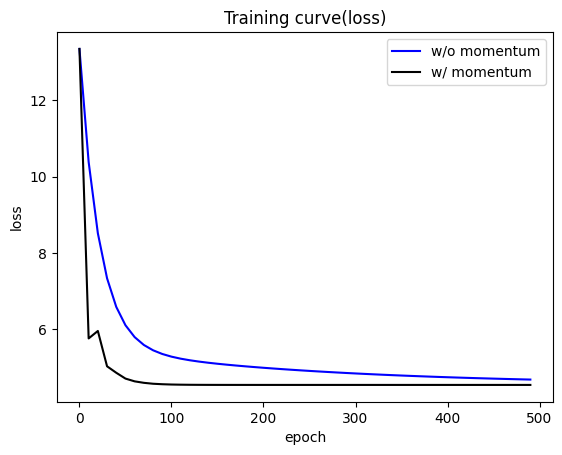

In [55]:
plt.plot(history[:,0],history[:,1],'b',label = 'w/o momentum')
plt.plot(history2[:,0],history2[:,1],'k',label = 'w/ momentum')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("Training curve(loss)")
plt.show()

CH.4 예측함수 정의하기
===============

In [56]:
# Layer Function Definition
l1 = torch.nn.Linear(784,128)
l2 = torch.nn.Linear(128,10)
relu = torch.nn.ReLU(inplace = True)

In [57]:
inputs = torch.randn(100,784)
m1 = l1(inputs)
m2 = relu(m1)
outputs = l2(m2)

print('input tensor : ', inputs.shape)
print('output tensor : ', outputs.shape)

input tensor :  torch.Size([100, 784])
output tensor :  torch.Size([100, 10])


In [58]:
net = torch.nn.Sequential(
    l1,
    relu,
    l2
)

outputs = net(inputs)
print('input tensor : ', inputs.shape)
print('output tensor : ', outputs.shape)

input tensor :  torch.Size([100, 784])
output tensor :  torch.Size([100, 10])


CH.5 선형 회귀
===========

5.3 선형 함수(nn.Linear)
---------------------

In [59]:
# single input, single output
torch.manual_seed(123)
l1 = torch.nn.Linear(1,1)
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [60]:
for param in l1.named_parameters():
    print('name : ', param[0])
    print('tensor : ', param[1]) # layer functions are automatically set to requires_grad = True, unlike the tensor variable
    print('shape : ', param[1].shape)
    print()

name :  weight
tensor :  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape :  torch.Size([1, 1])

name :  bias
tensor :  Parameter containing:
tensor([0.0331], requires_grad=True)
shape :  torch.Size([1])



In [61]:
# initialization -> y = 2x+1
torch.nn.init.constant_(l1.weight, 2.0)
torch.nn.init.constant_(l1.bias, 1.0)

print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [62]:
x_np = np.arange(-2,2.1,1)
x = torch.tensor(x_np).float()
x = x.view(-1,1)
print(x.shape) # not a 1d tensor, but 2d tensor whose shape is [5,1] due to [1,1] matrix operation 
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [63]:
y = l1(x)

print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


In [64]:
# double inputs, single output
l2 = torch.nn.Linear(2,1)
torch.nn.init.constant_(l2.weight,1.0)
torch.nn.init.constant_(l2.bias,2.0) # y = x1 + x2 + 2

print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [65]:
x2_np = np.array([[0,0],[0,1],[1,0],[1,1]])
x2 = torch.tensor(x2_np).float()

print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [66]:
y2 = l2(x2)
print(y2.shape)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


In [67]:
# multiple inputs and outputs
l3 = torch.nn.Linear(2,3)
torch.nn.init.constant_(l3.weight[0,:],1.0)
torch.nn.init.constant_(l3.weight[1,:],2.0)
torch.nn.init.constant_(l3.weight[2,:],3.0)
torch.nn.init.constant_(l3.bias,2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [68]:
y3 = l3(x2)
print(y3.shape)
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


5.4 커스텀 클래스를 이용한 모델의 정의
------------------------------

In [69]:
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__() # parent class(nn.Module) initialization
        self.l1 = torch.nn.Linear(n_input, n_output)  # output layer
    def forward(self, x): # prediction
        x1 = self.l1(x)
        return x1

In [70]:
inputs = torch.ones(100,1)
n_input, n_output = 1,1
net = Net(n_input=n_input, n_output=n_output)
output = net(inputs)

5.5 MSELoss 클래스를 이용한 손실함수
------------------------------

In [71]:
criterion = torch.nn.MSELoss()

5.6 데이터 준비
------------

In [72]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)
x_org = np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
yt = raw_df.values[1::2,2]
feature_names = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

print('original data : ', x_org.shape, yt.shape)
print('features : ',feature_names )

original data :  (506, 13) (506,)
features :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [73]:
x = x_org[:,feature_names == 'RM']
print('After Extraction : ', x.shape)
print(x[:5,:])

print('true data : ')
print(yt[:5])

After Extraction :  (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
true data : 
[24.  21.6 34.7 33.4 36.2]


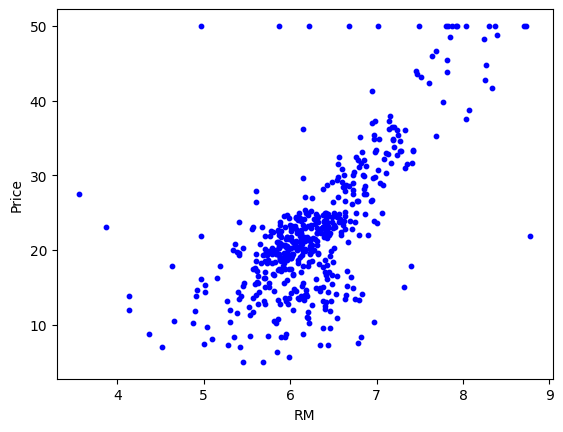

In [74]:
plt.scatter(x,yt,s = 10, c = 'b')
plt.xlabel("RM")
plt.ylabel("Price")
plt.show()

5.7 모델 정의
-----------

In [75]:
n_input = x.shape[1]
n_output = 1
print(f'input dim : {n_input}, output dim : {n_output}')

input dim : 1, output dim : 1


In [76]:
class Net(torch.nn.Module):
    def __init__(self,n_input,n_output):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input,n_output)
        
        torch.nn.init.constant_(self.l1.weight,1.0)
        torch.nn.init.constant_(self.l1.bias,1.0)
    
    def forward(self,x):
        return self.l1(x)

In [77]:
net = Net(n_input, n_output)

In [78]:
# named_parameters() : (name, value) pair
for parameter in net.named_parameters():
    print(f'variable name : {parameter[0]}')
    print(f'variable value : {parameter[1].data}')
    print()

variable name : l1.weight
variable value : tensor([[1.]])

variable name : l1.bias
variable value : tensor([1.])



In [79]:
# parameters : values only
for parameter in net.parameters():
    print(parameter.data)

tensor([[1.]])
tensor([1.])


In [80]:
# Summary of Net
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [81]:
from torchinfo import summary
summary(net, (1,)) # dim of input

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [82]:
criterion = torch.nn.MSELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(),lr = lr)

5.8 Graident Descent
--------

In [83]:
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

print(inputs.shape)
print(labels.shape) # N dim vector not allowed -> change to (N,1) shape matrix 

torch.Size([506, 1])
torch.Size([506])


In [84]:
labels1 = labels.view((-1,1))
print(labels1.shape)

torch.Size([506, 1])


In [85]:
outputs = net(inputs)
loss = criterion(outputs,labels1)
print(f'{loss.item():.5f}')

308.44986


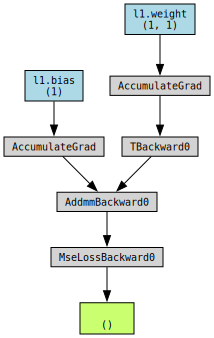

In [86]:
g = make_dot(loss, params  = dict(net.named_parameters()))
display(g)

In [87]:
loss.backward()
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [88]:
optimizer.step()
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [89]:
optimizer.zero_grad()
print(net.l1.weight.grad)
print(net.l1.bias.grad)

None
None


In [90]:
lr = 0.01

net = Net(n_input,n_output)
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(),lr = lr)
num_epoch = 50000
history = np.zeros((0,2))

for epoch in range(num_epoch):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1)/2.0
    loss.backward()
    optimizer.step()
    
    if(epoch%100 == 0) : 
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch : {epoch}, loss {loss.item():.5f}')

Epoch : 0, loss 154.22493
Epoch : 100, loss 29.61752
Epoch : 200, loss 29.43177
Epoch : 300, loss 29.25043
Epoch : 400, loss 29.07340
Epoch : 500, loss 28.90058
Epoch : 600, loss 28.73186
Epoch : 700, loss 28.56716
Epoch : 800, loss 28.40636
Epoch : 900, loss 28.24939
Epoch : 1000, loss 28.09615
Epoch : 1100, loss 27.94654
Epoch : 1200, loss 27.80050
Epoch : 1300, loss 27.65792
Epoch : 1400, loss 27.51873
Epoch : 1500, loss 27.38285
Epoch : 1600, loss 27.25020
Epoch : 1700, loss 27.12070
Epoch : 1800, loss 26.99428
Epoch : 1900, loss 26.87086
Epoch : 2000, loss 26.75037
Epoch : 2100, loss 26.63275
Epoch : 2200, loss 26.51792
Epoch : 2300, loss 26.40582
Epoch : 2400, loss 26.29639
Epoch : 2500, loss 26.18955
Epoch : 2600, loss 26.08525
Epoch : 2700, loss 25.98343
Epoch : 2800, loss 25.88404
Epoch : 2900, loss 25.78700
Epoch : 3000, loss 25.69227
Epoch : 3100, loss 25.59978
Epoch : 3200, loss 25.50950
Epoch : 3300, loss 25.42136
Epoch : 3400, loss 25.33532
Epoch : 3500, loss 25.25132
Epo

5.9 결과 확인
---------

In [91]:
print(f'initial loss : {history[0,1]:.5f}')
print(f'final loss : {history[-1,1]:.5f}')

initial loss : 154.22493
final loss : 21.80033


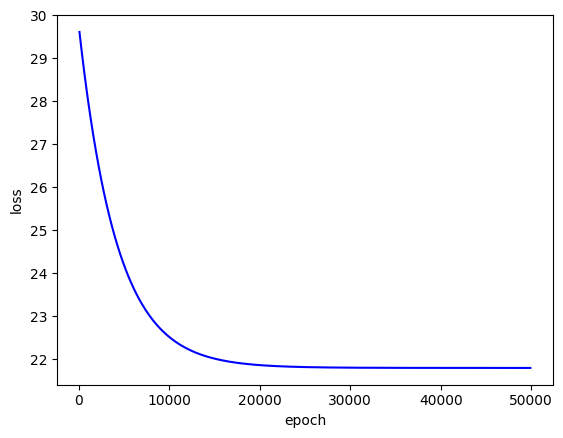

In [92]:
plt.plot(history[1:,0],history[1:,1],'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

5.10 중회귀 모델로 확장
----------

In [93]:
x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x,x_add))
print(x2.shape)
print(x2[:5,:])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [94]:
n_input = x2.shape[1]
print(n_input)
net = Net(n_input,n_output)

2


In [95]:
for parameter in net.named_parameters():
    print(f'variable name : {parameter[0]}')
    print(f'variable value : {parameter[1].data}')
    print()

variable name : l1.weight
variable value : tensor([[1., 1.]])

variable name : l1.bias
variable value : tensor([1.])



In [96]:
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [97]:
summary(net,(2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [98]:
# Training Fail
inputs = torch.tensor(x2).float()

lr = 0.01

net = Net(n_input,n_output)
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(),lr = lr)
num_epoch = 50000
history = np.zeros((0,2))

for epoch in range(num_epoch):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1)/2.0
    loss.backward()
    optimizer.step()
    
    if(epoch%100 == 0) : 
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch : {epoch}, loss {loss.item():.5f}')

Epoch : 0, loss 112.06398
Epoch : 100, loss 3753840700420118412554139598848.00000
Epoch : 200, loss inf
Epoch : 300, loss nan
Epoch : 400, loss nan
Epoch : 500, loss nan
Epoch : 600, loss nan
Epoch : 700, loss nan
Epoch : 800, loss nan
Epoch : 900, loss nan
Epoch : 1000, loss nan
Epoch : 1100, loss nan
Epoch : 1200, loss nan
Epoch : 1300, loss nan
Epoch : 1400, loss nan


Epoch : 1500, loss nan
Epoch : 1600, loss nan
Epoch : 1700, loss nan
Epoch : 1800, loss nan
Epoch : 1900, loss nan
Epoch : 2000, loss nan
Epoch : 2100, loss nan
Epoch : 2200, loss nan
Epoch : 2300, loss nan
Epoch : 2400, loss nan
Epoch : 2500, loss nan
Epoch : 2600, loss nan
Epoch : 2700, loss nan
Epoch : 2800, loss nan
Epoch : 2900, loss nan
Epoch : 3000, loss nan
Epoch : 3100, loss nan
Epoch : 3200, loss nan
Epoch : 3300, loss nan
Epoch : 3400, loss nan
Epoch : 3500, loss nan
Epoch : 3600, loss nan
Epoch : 3700, loss nan
Epoch : 3800, loss nan
Epoch : 3900, loss nan
Epoch : 4000, loss nan
Epoch : 4100, loss nan
Epoch : 4200, loss nan
Epoch : 4300, loss nan
Epoch : 4400, loss nan
Epoch : 4500, loss nan
Epoch : 4600, loss nan
Epoch : 4700, loss nan
Epoch : 4800, loss nan
Epoch : 4900, loss nan
Epoch : 5000, loss nan
Epoch : 5100, loss nan
Epoch : 5200, loss nan
Epoch : 5300, loss nan
Epoch : 5400, loss nan
Epoch : 5500, loss nan
Epoch : 5600, loss nan
Epoch : 5700, loss nan
Epoch : 580

In [99]:
# lr is too high ->  adjust
lr = 0.001

net = Net(n_input,n_output)
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(),lr = lr)
num_epoch = 2000
history = np.zeros((0,2))

for epoch in range(num_epoch):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1)/2.0
    loss.backward()
    optimizer.step()
    
    if(epoch%100 == 0) : 
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch : {epoch}, loss {loss.item():.5f}')

Epoch : 0, loss 112.06398
Epoch : 100, loss 25.35892
Epoch : 200, loss 16.39106
Epoch : 300, loss 15.40302
Epoch : 400, loss 15.29414
Epoch : 500, loss 15.28211
Epoch : 600, loss 15.28076
Epoch : 700, loss 15.28059
Epoch : 800, loss 15.28054
Epoch : 900, loss 15.28051
Epoch : 1000, loss 15.28048
Epoch : 1100, loss 15.28046
Epoch : 1200, loss 15.28043
Epoch : 1300, loss 15.28040
Epoch : 1400, loss 15.28037
Epoch : 1500, loss 15.28034
Epoch : 1600, loss 15.28031
Epoch : 1700, loss 15.28028
Epoch : 1800, loss 15.28026
Epoch : 1900, loss 15.28023


In [100]:
print(f'initial loss : {history[0,1]:.5f}')
print(f'final loss : {history[-1,1]:.5f}')

initial loss : 112.06398
final loss : 15.28023


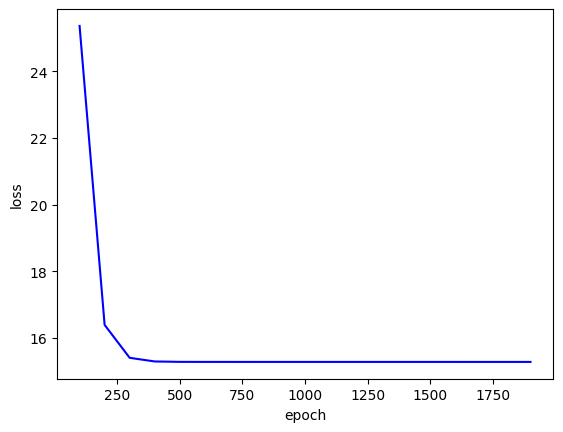

In [101]:
plt.plot(history[1:,0],history[1:,1],'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

CH.6 이진분류
==========

6.7 데이터 준비
------------

In [102]:
from sklearn.datasets import load_iris
iris = load_iris()
x_org,y_org = iris.data, iris.target

print('original data : ',x_org.shape, y_org.shape)

original data :  (150, 4) (150,)


In [103]:
x_data = iris.data[:100,:2]
y_data = iris.target[:100]

print('target data : ',x_data.shape, y_data.shape)

target data :  (100, 2) (100,)


In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size = 70, test_size=30, random_state = 123
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(70, 2) (30, 2) (70,) (30,)


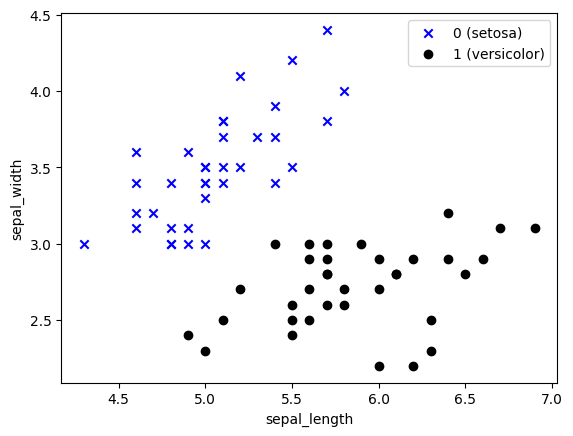

In [105]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:,0],x_t0[:,1],marker = 'x',c = 'b', label = '0 (setosa)')
plt.scatter(x_t1[:,0],x_t1[:,1],marker = 'o', c = 'k',label = '1 (versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

6.8 모델 정의
---------

In [106]:
n_input = x_train.shape[1]
n_output = 1
print(f'n_input : {n_input}, n_output:{n_output}')

n_input : 2, n_output:1


In [107]:
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input, n_output)
        self.sigmoid = torch.nn.Sigmoid()
        
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)
        
    def forward(self,x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        return x2

In [108]:
net = Net(n_input,n_output)

In [109]:
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [110]:
summary(net,(2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
├─Sigmoid: 1-2                           [1]                       --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

6.9 Graident Descent
----------

In [111]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()
labels1 = labels.view((-1,1))
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()
labels1_test = labels_test.view((-1,1))

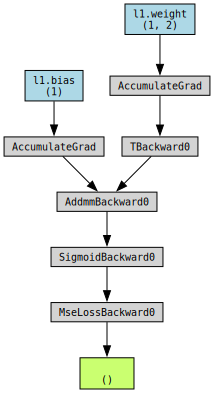

In [112]:
outputs = net(inputs)
loss = criterion(outputs, labels1)
g = make_dot(loss,params = dict(net.named_parameters()))
display(g)

In [113]:
lr = 0.01
n_input = x_train.shape[1]
n_output = 1
net = Net(n_input, n_output)
criterion = torch.nn.BCELoss()
optimizer = optim.SGD(net.parameters(),lr = lr)
num_epoch = 10000
history = np.zeros((0,5))

In [114]:
for epoch in range(num_epoch):
    # train phase
    
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels1)
    
    loss.backward()
    optimizer.step()
    
    train_loss = loss.item()
    predicted = torch.where(outputs<0.5, 0, 1) # 0 if condition is true, else 1
    train_acc = (predicted == labels1).sum()/len(y_train)
    
    # predict phase
    
    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test, labels1_test)
    val_loss = loss_test.item()
    predicted_test = torch.where(outputs_test<0.5, 0, 1)
    val_acc = (predicted_test == labels1_test).sum()/len(y_test)
    
    if (epoch%10 == 0):
        print(f'Epoch [{epoch}/{num_epoch}], Loss {train_loss:5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))
        

Epoch [0/10000], Loss 4.772894, acc: 0.50000, val_loss: 4.49384, val_acc: 0.50000
Epoch [10/10000], Loss 3.805461, acc: 0.50000, val_loss: 3.56537, val_acc: 0.50000
Epoch [20/10000], Loss 2.843284, acc: 0.50000, val_loss: 2.64328, val_acc: 0.50000
Epoch [30/10000], Loss 1.916133, acc: 0.50000, val_loss: 1.76244, val_acc: 0.50000
Epoch [40/10000], Loss 1.171369, acc: 0.50000, val_loss: 1.08537, val_acc: 0.50000
Epoch [50/10000], Loss 0.841403, acc: 0.50000, val_loss: 0.81872, val_acc: 0.50000
Epoch [60/10000], Loss 0.770873, acc: 0.50000, val_loss: 0.77093, val_acc: 0.50000
Epoch [70/10000], Loss 0.754498, acc: 0.34286, val_loss: 0.76105, val_acc: 0.33333
Epoch [80/10000], Loss 0.745416, acc: 0.25714, val_loss: 0.75447, val_acc: 0.20000
Epoch [90/10000], Loss 0.737336, acc: 0.24286, val_loss: 0.74778, val_acc: 0.16667
Epoch [100/10000], Loss 0.729494, acc: 0.24286, val_loss: 0.74098, val_acc: 0.13333
Epoch [110/10000], Loss 0.721797, acc: 0.27143, val_loss: 0.73419, val_acc: 0.16667
Epo

Epoch [490/10000], Loss 0.507925, acc: 1.00000, val_loss: 0.54199, val_acc: 0.93333
Epoch [500/10000], Loss 0.503901, acc: 1.00000, val_loss: 0.53833, val_acc: 0.93333
Epoch [510/10000], Loss 0.499938, acc: 1.00000, val_loss: 0.53472, val_acc: 0.93333
Epoch [520/10000], Loss 0.496036, acc: 1.00000, val_loss: 0.53116, val_acc: 0.93333
Epoch [530/10000], Loss 0.492194, acc: 1.00000, val_loss: 0.52766, val_acc: 0.93333
Epoch [540/10000], Loss 0.488410, acc: 1.00000, val_loss: 0.52421, val_acc: 0.93333
Epoch [550/10000], Loss 0.484684, acc: 1.00000, val_loss: 0.52080, val_acc: 0.93333
Epoch [560/10000], Loss 0.481014, acc: 1.00000, val_loss: 0.51745, val_acc: 0.93333
Epoch [570/10000], Loss 0.477398, acc: 1.00000, val_loss: 0.51415, val_acc: 0.93333
Epoch [580/10000], Loss 0.473837, acc: 1.00000, val_loss: 0.51089, val_acc: 0.93333
Epoch [590/10000], Loss 0.470329, acc: 1.00000, val_loss: 0.50769, val_acc: 0.93333
Epoch [600/10000], Loss 0.466873, acc: 1.00000, val_loss: 0.50452, val_acc: 

6.10 결과 확인
--------

In [115]:
print(f'initial state : loss = {history[0,3]:.5f}, acc = {history[0,4]:.5f}')
print(f'final state : loss = {history[-1,3]:.5f}, acc = {history[-1,4]:.5f}')

initial state : loss = 4.49384, acc = 0.50000
final state : loss = 0.15395, acc = 0.96667


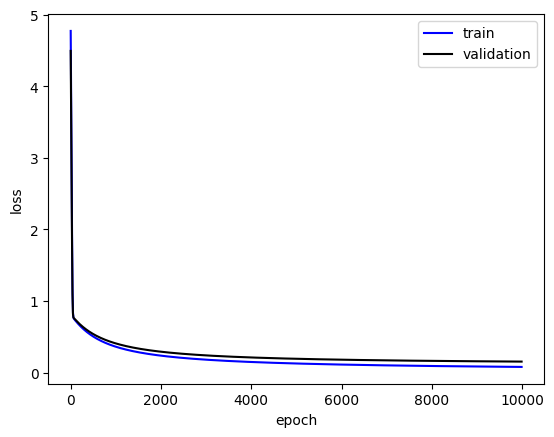

In [116]:
plt.plot(history[:,0],history[:,1],'b',label = 'train')
plt.plot(history[:,0],history[:,3],'k',label = 'validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

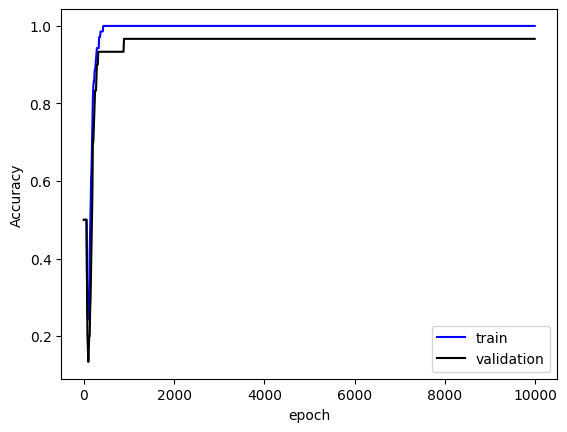

In [117]:
plt.plot(history[:,0],history[:,2],'b',label = 'train')
plt.plot(history[:,0],history[:,4],'k',label = 'validation')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

CH.7 다중 분류
========

7.8 데이터 준비
---------

In [118]:
x_select = x_org[:,[0,2]]
print('original :', x_select.shape, y_org.shape)

original : (150, 2) (150,)


In [119]:
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size = 75, test_size = 75, random_state = 123
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


In [121]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

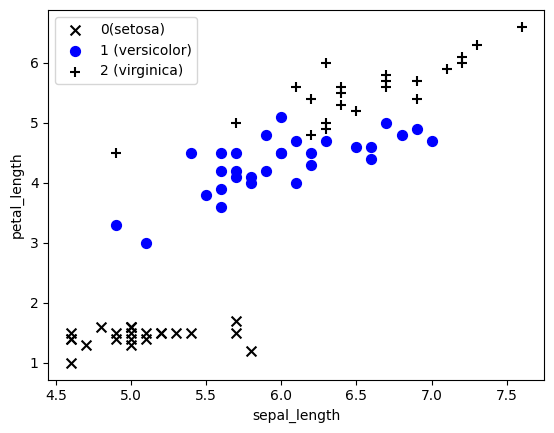

In [122]:
plt.scatter(x_t0[:,0],x_t0[:,1],marker = 'x', c = 'k', s = 50, label = '0(setosa)')
plt.scatter(x_t1[:,0],x_t1[:,1], marker = 'o', c = 'b', s = 50, label = '1 (versicolor)')
plt.scatter(x_t2[:,0],x_t2[:,1],marker = '+', c = 'k', s = 50, label = '2 (virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

7.9 모델 정의
---------

In [123]:
n_input = x_train.shape[1]
n_output = len(list(set(y_train)))
print(f'n_input: {n_input}, n_output: {n_output}')

n_input: 2, n_output: 3


In [124]:
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input, n_output)
        
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)
        
    def forward(self, x):
        x1 = self.l1(x)
        return x1

net = Net(n_input,n_output)

In [125]:
for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))


In [126]:
criterion = torch.nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(),lr = lr)

7.10 Gradient Descent
-------------

In [131]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

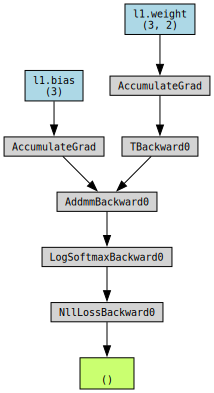

In [132]:
outputs = net(inputs)
loss = criterion(outputs, labels)
g = make_dot(loss, params = dict(net.named_parameters()))
display(g)

In [133]:
lr = 0.01
net = Net(n_input, n_output)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = lr)
num_epoch = 10000
history = np.zeros((0,5))

In [134]:
for epoch in range(num_epoch):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    predicted = torch.max(outputs,1)[1] # note : maximum value in vector corresponds to the value after the soft_max function
    
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()/len(labels)
    
    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test,labels_test)
    predicted_test = torch.max(outputs_test, 1)[1]
    val_loss = loss_test.item()
    val_acc = (predicted_test == labels_test).sum()/len(labels_test)
    
    if (epoch % 10 == 0):
        print(f'Epoch [{epoch}/{num_epoch}], loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc:5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861, acc: 0.30667, val_loss: 1.09263, val_acc: 0.266667
Epoch [10/10000], loss: 1.03580, acc: 0.40000, val_loss: 1.06403, val_acc: 0.266667
Epoch [20/10000], loss: 1.00477, acc: 0.40000, val_loss: 1.03347, val_acc: 0.266667
Epoch [30/10000], loss: 0.97672, acc: 0.40000, val_loss: 1.00264, val_acc: 0.266667
Epoch [40/10000], loss: 0.95057, acc: 0.41333, val_loss: 0.97351, val_acc: 0.266667
Epoch [50/10000], loss: 0.92616, acc: 0.48000, val_loss: 0.94631, val_acc: 0.386667
Epoch [60/10000], loss: 0.90338, acc: 0.69333, val_loss: 0.92098, val_acc: 0.560000
Epoch [70/10000], loss: 0.88212, acc: 0.70667, val_loss: 0.89740, val_acc: 0.600000
Epoch [80/10000], loss: 0.86227, acc: 0.70667, val_loss: 0.87545, val_acc: 0.613333
Epoch [90/10000], loss: 0.84373, acc: 0.70667, val_loss: 0.85500, val_acc: 0.626667
Epoch [100/10000], loss: 0.82640, acc: 0.70667, val_loss: 0.83594, val_acc: 0.626667
Epoch [110/10000], loss: 0.81019, acc: 0.72000, val_loss: 0.81815, val_acc: 

7.11 결과 확인
-----

In [136]:
print(f'initial state : loss = {history[0,3]:.5f}, acc = {history[0,4]:.5f}')
print(f'final state : loss = {history[-1,3]:.5f}, acc = {history[-1,4]:.5f}')

initial state : loss = 1.09263, acc = 0.26667
final state : loss = 0.19795, acc = 0.96000


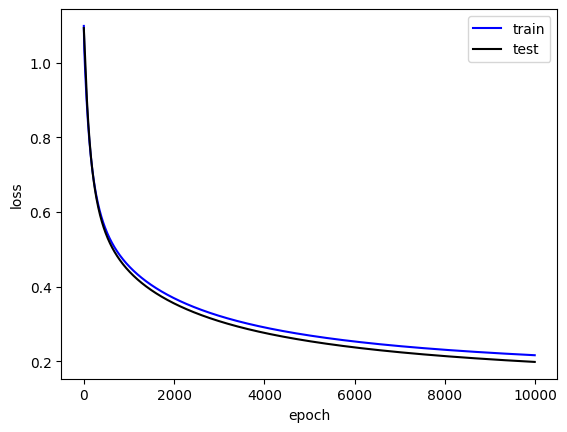

In [137]:
plt.plot(history[:,0], history[:,1],'b',label = 'train')
plt.plot(history[:,0],history[:,3],'k',label = 'test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

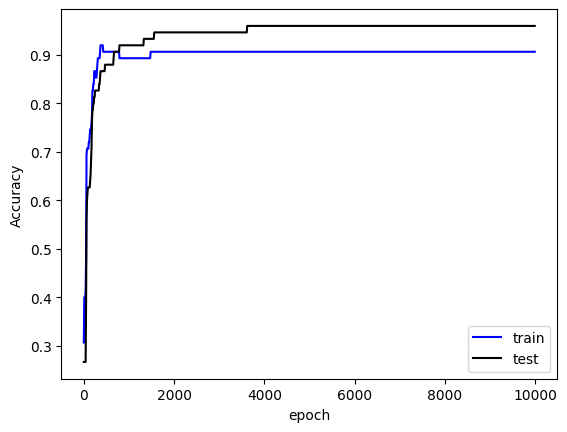

In [138]:
plt.plot(history[:,0], history[:,2],'b',label = 'train')
plt.plot(history[:,0],history[:,4],'k',label = 'test')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [139]:
print(net.l1.weight.data)
print(net.l1.bias.data)

tensor([[ 3.0452, -2.5735],
        [ 1.3573,  0.8481],
        [-1.4026,  4.7253]])
tensor([ 1.7178,  1.6563, -0.3741])


CH.8 MNIST를 활용한 숫자 인식
========================

8.5 GPU 사용하기
-------------

In [3]:
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps:0


8.6 데이터 준비 1
---------

In [4]:
import torchvision.datasets as datasets
data_root = './data'

train_set0 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True
)

In [148]:
print("# of data : ", len(train_set0))
image, label = train_set0[0]
print("input data : ", type(image))
print("ground truth data : ", type(label))

# of data :  60000
input data :  <class 'PIL.Image.Image'>
ground truth data :  <class 'int'>


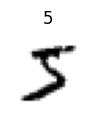

In [149]:
plt.figure(figsize = (1,1))
plt.title(f'{label}')
plt.imshow(image, cmap = 'gray_r')
plt.axis('off')
plt.show()

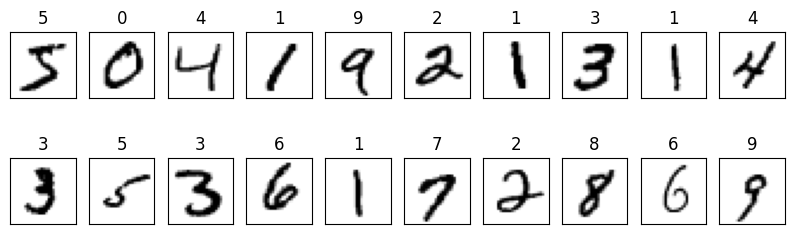

In [151]:
plt.figure(figsize = (10,3))
for i in range(20):
    ax = plt.subplot(2,10,i+1)
    image, label = train_set0[i]
    plt.imshow(image, cmap = 'gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

8.9 데이터 준비2(Transform을 활용한 데이터 전처리)
---------

In [5]:
import torchvision.transforms as transforms

transform1 = transforms.Compose( # Change MNIST data to torch.tensor
    [
        transforms.ToTensor(),
    ]
)

train_set1 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True,
    transform = transform1
)

In [164]:
image, label = train_set1[0]
print("input data type : ", type(image))
print("input data shape : ", image.shape)
print("min : ", image.data.min())
print("max : ", image.data.max())

input data type :  <class 'torch.Tensor'>
input data shape :  torch.Size([1, 28, 28])
min :  tensor(0.)
max :  tensor(1.)


In [165]:
transform2 = transforms.Compose( # Transform instance : sequentially do the preprocessing
    [
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5) # want to change data b/w -1 to 1 where data is in [0,1]
    ]
)

train_set2 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True,
    transform = transform2
)

In [166]:
image, label = train_set2[0]
print("input data type : ", type(image))
print("input data shape : ", image.shape)
print("min : ", image.data.min())
print("max : ", image.data.max())

input data type :  <class 'torch.Tensor'>
input data shape :  torch.Size([1, 28, 28])
min :  tensor(-1.)
max :  tensor(1.)


In [167]:
transform3 = transforms.Compose( # Transform instance : sequentially do the preprocessing
    [
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5), # want to change data b/w -1 to 1 where data is in [0,1]
        transforms.Lambda(lambda x : x.view(-1)), # use labmda function to change tensor to 1d
    ]
)

train_set3 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True,
    transform = transform3
)

In [168]:
image, label = train_set3[0]
print("input data type : ", type(image))
print("input data shape : ", image.shape)
print("min : ", image.data.min())
print("max : ", image.data.max())

input data type :  <class 'torch.Tensor'>
input data shape :  torch.Size([784])
min :  tensor(-1.)
max :  tensor(1.)


In [7]:
transform = transforms.Compose( # Transform instance : sequentially do the preprocessing
    [
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5), # want to change data b/w -1 to 1 where data is in [0,1]
        transforms.Lambda(lambda x : x.view(-1)), # use labmda function to change tensor to 1d
    ]
)

train_set= datasets.MNIST(
    root = data_root,
    train = True,
    download = True,
    transform = transform
)

test_set= datasets.MNIST(
    root = data_root,
    train = False,
    download = True,
    transform = transform
)


8.10 데이터 준비3 (데이터 로더를 활용한 미니 배치 데이터 생성)
-----------

In [8]:
from torch.utils.data import DataLoader

batch_size = 500

train_loader = DataLoader(
    train_set, batch_size= batch_size, shuffle = True
)

test_loader = DataLoader(
    test_set, batch_size= batch_size, shuffle = False
)

In [194]:
print(len(train_loader)) # how many group that data loader can get -> 60000/500 = 120
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


8.11 모델 정의
-------

In [195]:
n_input = image.shape[0]
n_output = len(set(list(labels.data.numpy())))
n_hidden = 128
print(f'n_input : {n_input}, n_hidden : {n_hidden}, n_output : {n_output}')

n_input : 784, n_hidden : 128, n_output : 10


In [196]:
class Net(torch.nn.Module):
    def __init__(self,n_input, n_output, n_hidden):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input, n_hidden)
        self.l2 = torch.nn.Linear(n_hidden, n_output)
        self.relu = torch.nn.ReLU(inplace = True)
        
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [197]:
torch.manual_seed(123)
torch.mps.manual_seed(123)

net = Net(n_input, n_output, n_hidden)
net = net.to(device)

In [198]:
for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='mps:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190,

In [199]:
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


8.12 Gradient Descent
----------

In [200]:
for images, labels in train_loader : 
    break

inputs = images.to(device)
labels = labels.to(device)

In [201]:
outputs = net(inputs)
print(outputs)

tensor([[-0.2908, -0.0540,  0.0845,  ...,  0.0779,  0.1828,  0.1080],
        [-0.2764, -0.3271, -0.1788,  ...,  0.1037,  0.1030, -0.0235],
        [-0.3289, -0.0409,  0.1447,  ...,  0.3945,  0.2317,  0.1213],
        ...,
        [-0.4067, -0.0062,  0.1470,  ...,  0.0346,  0.1045,  0.1304],
        [-0.3684, -0.2211,  0.1907,  ...,  0.0544,  0.2114,  0.1275],
        [-0.2524, -0.2597,  0.1427,  ...,  0.0983,  0.1258,  0.0972]],
       device='mps:0', grad_fn=<LinearBackward0>)


In [202]:
loss = criterion(outputs, labels)

2.3259594440460205


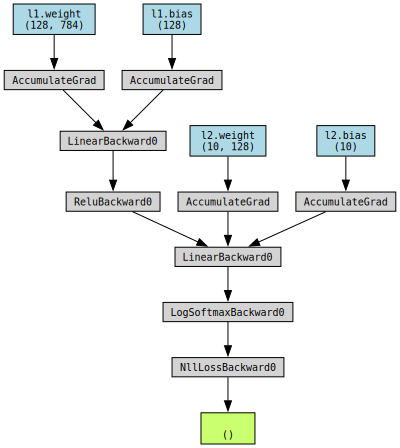

In [203]:
print(loss.item())
make_dot(loss, params = dict(net.named_parameters()))

In [227]:
torch.manual_seed(123)
torch.mps.manual_seed(123)

lr = 0.01
net = Net(n_input,n_output, n_hidden).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = lr)
num_epochs = 100
history = np.zeros((0,5))

In [228]:
from tqdm.notebook import tqdm

In [229]:
for epoch in range(num_epochs):
    train_acc, train_loss = 0,0
    val_acc, val_loss = 0,0
    
    n_train, n_test = 0,0
    
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        predicted = torch.max(outputs,1)[1] # note : maximum value in vector corresponds to the value after the soft_max function
    
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()
        
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)
        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)
        
        outputs_test = net(inputs_test)
        loss_test = criterion(outputs_test, labels_test)
        prediceted_test = torch.max(outputs_test,1)[1]
        
        val_loss += loss_test.item()
        val_acc += (prediceted_test == labels_test).sum().item()
    if epoch%10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f}, acc: {train_acc/n_train:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc/n_test:5f}')
    item = np.array([epoch, train_loss, train_acc/n_train, val_loss, val_acc/n_test])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [0/100], loss: 219.51890, acc: 0.56960, val_loss: 26.52574, val_acc: 0.746600


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 44.17434, acc: 0.89592, val_loss: 6.97354, val_acc: 0.901600


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 37.43867, acc: 0.91037, val_loss: 5.99298, val_acc: 0.915200


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [30/100], loss: 33.87954, acc: 0.91955, val_loss: 5.49702, val_acc: 0.921800


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [40/100], loss: 31.10052, acc: 0.92602, val_loss: 5.11146, val_acc: 0.926400


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [50/100], loss: 28.63691, acc: 0.93208, val_loss: 4.73994, val_acc: 0.933000


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [60/100], loss: 26.41066, acc: 0.93808, val_loss: 4.39986, val_acc: 0.937300


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [70/100], loss: 24.41621, acc: 0.94292, val_loss: 4.09562, val_acc: 0.940800


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [80/100], loss: 22.66358, acc: 0.94713, val_loss: 3.83702, val_acc: 0.943500


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [90/100], loss: 21.12921, acc: 0.95095, val_loss: 3.58940, val_acc: 0.948000


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

In [230]:
print(f'initial state : loss = {history[0,3]:.5f}, acc = {history[0,4]:.5f}')
print(f'final state : loss = {history[-1,3]:.5f}, acc = {history[-1,4]:.5f}')

initial state : loss = 26.52574, acc = 0.74660
final state : loss = 3.41250, acc = 0.94960


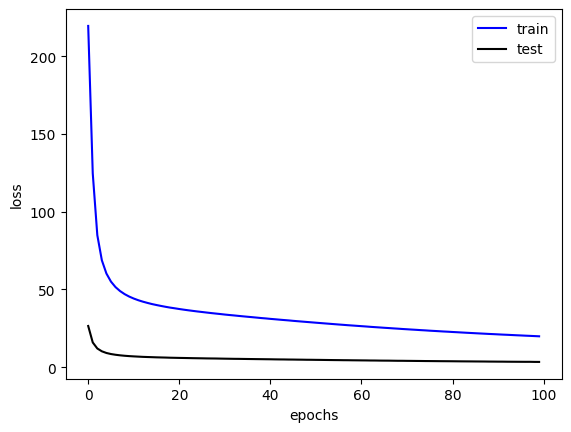

In [231]:
plt.plot(history[:,0],history[:,1],'b',label = 'train')
plt.plot(history[:,0],history[:,3],'k',label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

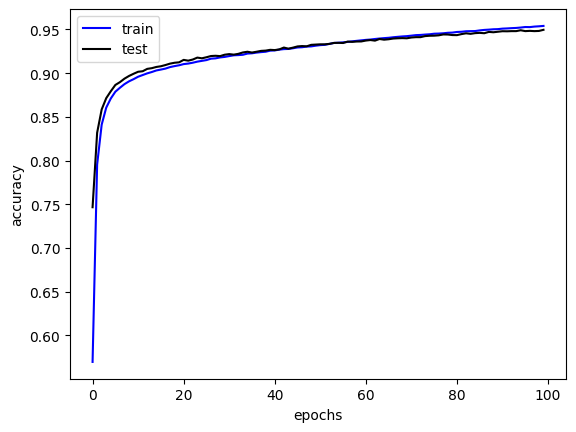

In [232]:
plt.plot(history[:,0],history[:,2],'b',label = 'train')
plt.plot(history[:,0],history[:,4],'k',label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

CH.9 CNN을 활용한 이미지 인식
===============

9.4 파이토치에서 CNN을 구현하는 방법
-----

In [233]:
conv1 = torch.nn.Conv2d(3,32,3) # (# of input channel, # of output channel, kernel size)
relu = torch.nn.ReLU(inplace = True)
conv2 = torch.nn.Conv2d(32,32,3)
maxpool = torch.nn.MaxPool2d((2,2))

In [234]:
print(conv1)
print(conv1.weight.shape)
print(conv1.bias.shape)
print(conv2.weight.shape)
print(conv2.bias.shape)

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([32, 32, 3, 3])
torch.Size([32])


In [235]:
inputs = torch.randn(100,3,32,32)
print(inputs.shape)

torch.Size([100, 3, 32, 32])


In [236]:
x1 = conv1(inputs)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)

In [237]:
print(inputs.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)

torch.Size([100, 3, 32, 32])
torch.Size([100, 32, 30, 30])
torch.Size([100, 32, 30, 30])
torch.Size([100, 32, 28, 28])
torch.Size([100, 32, 28, 28])
torch.Size([100, 32, 14, 14])


In [238]:
features = torch.nn.Sequential(
    conv1,
    relu,
    conv2,
    relu,
    maxpool
)
outputs = features(inputs)
print(outputs.shape)

torch.Size([100, 32, 14, 14])


In [239]:
flatten = torch.nn.Flatten()
outputs2 = flatten(outputs)
print(outputs.shape)
print(outputs2.shape)

torch.Size([100, 32, 14, 14])
torch.Size([100, 6272])


9.5 공통 함수 사용하기
---------

In [240]:
def eval_loss(loader, device, net, criterion):
    for images, labels in loader:
        break
    inputs = images.to(device)
    labels = labels.to(device)
    
    outputs = net(inputs)
    
    loss = criterion(outputs,labels)
    
    return loss

In [9]:
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):
    from tqdm import tqdm
    
    base_epochs = len(history)
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        
        net.train()
        n_train = 0
        for inputs, labels in tqdm(train_loader):
            n_train += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = net(inputs)
        
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
            predicted = torch.max(outputs,1)[1] 
            train_loss += loss.item()
            train_acc += (predicted == labels).sum().item()
            
        val_loss = 0
        val_acc = 0
        
        net.eval()
        n_test = 0
        for inputs_test, labels_test in test_loader:
            n_test += len(labels_test)
            inputs_test = inputs_test.to(device)
            labels_test = labels_test.to(device)
            
            outputs_test = net(inputs_test)
            loss_test = criterion(outputs_test, labels_test)
            prediceted_test = torch.max(outputs_test,1)[1]
            
            val_loss += loss_test.item()
            val_acc += (prediceted_test == labels_test).sum().item()
        print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f}, acc: {train_acc/n_train:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc/n_test:5f}')
        item = np.array([epoch, train_loss, train_acc/n_train, val_loss, val_acc/n_test])
        history = np.vstack((history, item))

    return history
    

In [10]:
def evaluate_history(history):
    print(f'initial state : loss = {history[0,3]:.5f}, acc = {history[0,4]:.5f}')
    print(f'final state : loss = {history[-1,3]:.5f}, acc = {history[-1,4]:.5f}')
    
    plt.plot(history[:,0],history[:,1],'b',label = 'train')
    plt.plot(history[:,0],history[:,3],'k',label = 'test')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
    plt.plot(history[:,0],history[:,2],'b',label = 'train')
    plt.plot(history[:,0],history[:,4],'k',label = 'test')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [11]:
def torch_seed(seed = 123):
    torch.manual_seed(seed)
    torch.mps.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True

9.6 데이터 준비
-----

In [245]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),
    transforms.Lambda(lambda x : x.view(-1)),]
)

transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),]
)

In [246]:
data_root = './data'

train_set1 = datasets.CIFAR10(
    root = data_root, train = True, download = True, transform = transform1
)

test_set1 = datasets.CIFAR10(
    root = data_root, train = False, download = True, transform = transform1
)

train_set2 = datasets.CIFAR10(
    root = data_root, train = True, download = True, transform = transform2
)

test_set2 = datasets.CIFAR10(
    root = data_root, train = False, download = True, transform = transform2
)

100%|██████████| 170498071/170498071 [00:40<00:00, 4174451.82it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [247]:
batch_size = 100

train_loader1 = DataLoader(train_set1, batch_size=batch_size, shuffle = True)
test_loader1 = DataLoader(test_set1, batch_size = batch_size, shuffle = False)

train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle = True)
test_loader2 = DataLoader(test_set2, batch_size = batch_size, shuffle = False)

In [248]:
classes = ('plane','car','bird','cat','deer','dog','frog', 'horse','ship','truch')

9.7 모델 정의
---------

In [251]:
for images, labels in train_loader1:
    break

In [257]:
n_input = images.shape[1]
n_output = len(set(list(labels.data.numpy())))
n_hidden = 128

print(f'n_input : {n_input}, n_output : {n_output}, n_hidden : {n_hidden}')

n_input : 3072, n_output : 10, n_hidden : 128


In [262]:
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input, n_hidden)
        self.l2 = torch.nn.Linear(n_hidden, n_output)
        self.relu = torch.nn.ReLU(inplace = True)
        
    def forward(self, x):
        x1 = self.l1(x)
        x2 = relu(x1)
        x3 = self.l2(x2)
        return x3
        

9.9 결과
-----

In [263]:
torch_seed()

net = Net(n_input, n_output, n_hidden).to(device)
criterion =torch.nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(),lr = lr)
num_epochs = 50
history = np.zeros((0,5))
history = fit(net, optimizer, criterion, num_epochs,train_loader1, test_loader1, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:04<00:00, 105.16it/s]


Epoch [0/50], loss: 974.82492, acc: 0.32202, val_loss: 179.42884, val_acc: 0.376900


100%|██████████| 500/500 [00:04<00:00, 112.04it/s]


Epoch [1/50], loss: 869.21003, acc: 0.39564, val_loss: 168.43080, val_acc: 0.417500


100%|██████████| 500/500 [00:04<00:00, 111.47it/s]


Epoch [2/50], loss: 827.50859, acc: 0.42436, val_loss: 162.22506, val_acc: 0.437800


100%|██████████| 500/500 [00:04<00:00, 110.80it/s]


Epoch [3/50], loss: 801.17335, acc: 0.44214, val_loss: 158.25488, val_acc: 0.450900


100%|██████████| 500/500 [00:04<00:00, 112.35it/s]


Epoch [4/50], loss: 781.60045, acc: 0.45538, val_loss: 155.30995, val_acc: 0.461500


100%|██████████| 500/500 [00:04<00:00, 112.56it/s]


Epoch [5/50], loss: 766.15658, acc: 0.46776, val_loss: 152.97293, val_acc: 0.468500


100%|██████████| 500/500 [00:04<00:00, 112.28it/s]


Epoch [6/50], loss: 752.43363, acc: 0.47722, val_loss: 151.21530, val_acc: 0.474400


100%|██████████| 500/500 [00:04<00:00, 113.18it/s]


Epoch [7/50], loss: 740.03638, acc: 0.48614, val_loss: 149.27770, val_acc: 0.479000


100%|██████████| 500/500 [00:04<00:00, 112.68it/s]


Epoch [8/50], loss: 728.40500, acc: 0.49568, val_loss: 147.96186, val_acc: 0.487100


100%|██████████| 500/500 [00:04<00:00, 113.11it/s]


Epoch [9/50], loss: 717.39982, acc: 0.50456, val_loss: 146.31362, val_acc: 0.488600


100%|██████████| 500/500 [00:04<00:00, 112.63it/s]


Epoch [10/50], loss: 706.61301, acc: 0.51140, val_loss: 145.00468, val_acc: 0.496500


100%|██████████| 500/500 [00:04<00:00, 112.01it/s]


Epoch [11/50], loss: 697.12506, acc: 0.51970, val_loss: 143.71174, val_acc: 0.502500


100%|██████████| 500/500 [00:04<00:00, 112.54it/s]


Epoch [12/50], loss: 687.51328, acc: 0.52630, val_loss: 142.52067, val_acc: 0.505000


100%|██████████| 500/500 [00:04<00:00, 112.32it/s]


Epoch [13/50], loss: 678.44911, acc: 0.53482, val_loss: 142.25161, val_acc: 0.504700


100%|██████████| 500/500 [00:04<00:00, 112.20it/s]


Epoch [14/50], loss: 670.28219, acc: 0.53910, val_loss: 140.74037, val_acc: 0.512600


100%|██████████| 500/500 [00:04<00:00, 113.23it/s]


Epoch [15/50], loss: 661.90747, acc: 0.54594, val_loss: 140.16020, val_acc: 0.510600


100%|██████████| 500/500 [00:04<00:00, 111.64it/s]


Epoch [16/50], loss: 653.59344, acc: 0.55122, val_loss: 139.04655, val_acc: 0.515300


100%|██████████| 500/500 [00:04<00:00, 110.73it/s]


Epoch [17/50], loss: 646.51624, acc: 0.55676, val_loss: 138.80849, val_acc: 0.514300


100%|██████████| 500/500 [00:04<00:00, 112.22it/s]


Epoch [18/50], loss: 639.13696, acc: 0.56204, val_loss: 137.88311, val_acc: 0.519700


100%|██████████| 500/500 [00:04<00:00, 111.76it/s]


Epoch [19/50], loss: 631.79599, acc: 0.56674, val_loss: 138.03300, val_acc: 0.516800


100%|██████████| 500/500 [00:04<00:00, 111.49it/s]


Epoch [20/50], loss: 625.45479, acc: 0.57110, val_loss: 137.15415, val_acc: 0.518000


100%|██████████| 500/500 [00:04<00:00, 112.65it/s]


Epoch [21/50], loss: 618.62367, acc: 0.57690, val_loss: 136.74672, val_acc: 0.524800


100%|██████████| 500/500 [00:04<00:00, 110.66it/s]


Epoch [22/50], loss: 612.38739, acc: 0.58018, val_loss: 136.22887, val_acc: 0.526000


100%|██████████| 500/500 [00:04<00:00, 112.64it/s]


Epoch [23/50], loss: 606.45344, acc: 0.58348, val_loss: 135.49806, val_acc: 0.525500


100%|██████████| 500/500 [00:04<00:00, 112.15it/s]


Epoch [24/50], loss: 600.04689, acc: 0.59138, val_loss: 135.23811, val_acc: 0.526900


100%|██████████| 500/500 [00:04<00:00, 111.63it/s]


Epoch [25/50], loss: 594.61286, acc: 0.59348, val_loss: 135.08211, val_acc: 0.529300


100%|██████████| 500/500 [00:04<00:00, 111.74it/s]


Epoch [26/50], loss: 588.66298, acc: 0.59864, val_loss: 134.99789, val_acc: 0.526500


100%|██████████| 500/500 [00:04<00:00, 110.84it/s]


Epoch [27/50], loss: 583.21974, acc: 0.60194, val_loss: 134.35205, val_acc: 0.529600


100%|██████████| 500/500 [00:04<00:00, 111.85it/s]


Epoch [28/50], loss: 577.87097, acc: 0.60498, val_loss: 134.21795, val_acc: 0.530000


100%|██████████| 500/500 [00:04<00:00, 111.76it/s]


Epoch [29/50], loss: 572.42706, acc: 0.60912, val_loss: 134.56567, val_acc: 0.528500


100%|██████████| 500/500 [00:04<00:00, 112.21it/s]


Epoch [30/50], loss: 567.28399, acc: 0.61390, val_loss: 134.00516, val_acc: 0.528600


100%|██████████| 500/500 [00:04<00:00, 111.85it/s]


Epoch [31/50], loss: 562.03559, acc: 0.61764, val_loss: 133.74315, val_acc: 0.528700


100%|██████████| 500/500 [00:04<00:00, 110.06it/s]


Epoch [32/50], loss: 557.26007, acc: 0.62192, val_loss: 133.81939, val_acc: 0.531400


100%|██████████| 500/500 [00:04<00:00, 112.25it/s]


Epoch [33/50], loss: 552.41708, acc: 0.62570, val_loss: 134.17584, val_acc: 0.526800


100%|██████████| 500/500 [00:04<00:00, 112.19it/s]


Epoch [34/50], loss: 547.53517, acc: 0.62868, val_loss: 134.05137, val_acc: 0.526000


100%|██████████| 500/500 [00:04<00:00, 112.16it/s]


Epoch [35/50], loss: 542.82150, acc: 0.63186, val_loss: 133.40201, val_acc: 0.532100


100%|██████████| 500/500 [00:04<00:00, 111.18it/s]


Epoch [36/50], loss: 538.12070, acc: 0.63608, val_loss: 133.95545, val_acc: 0.527100


100%|██████████| 500/500 [00:04<00:00, 110.44it/s]


Epoch [37/50], loss: 533.69329, acc: 0.63984, val_loss: 133.60610, val_acc: 0.531300


100%|██████████| 500/500 [00:04<00:00, 112.14it/s]


Epoch [38/50], loss: 529.46118, acc: 0.64234, val_loss: 134.12765, val_acc: 0.530100


100%|██████████| 500/500 [00:04<00:00, 111.33it/s]


Epoch [39/50], loss: 525.10421, acc: 0.64516, val_loss: 134.82758, val_acc: 0.524300


100%|██████████| 500/500 [00:04<00:00, 112.30it/s]


Epoch [40/50], loss: 520.17596, acc: 0.64890, val_loss: 134.07126, val_acc: 0.528300


100%|██████████| 500/500 [00:04<00:00, 112.18it/s]


Epoch [41/50], loss: 516.25979, acc: 0.65106, val_loss: 134.74118, val_acc: 0.528100


100%|██████████| 500/500 [00:04<00:00, 111.25it/s]


Epoch [42/50], loss: 512.40183, acc: 0.65340, val_loss: 134.65161, val_acc: 0.525400


100%|██████████| 500/500 [00:04<00:00, 112.43it/s]


Epoch [43/50], loss: 507.95802, acc: 0.65674, val_loss: 134.59897, val_acc: 0.527500


100%|██████████| 500/500 [00:04<00:00, 112.49it/s]


Epoch [44/50], loss: 503.30840, acc: 0.65998, val_loss: 134.49493, val_acc: 0.528700


100%|██████████| 500/500 [00:04<00:00, 112.25it/s]


Epoch [45/50], loss: 500.02316, acc: 0.66212, val_loss: 134.41375, val_acc: 0.531100


100%|██████████| 500/500 [00:04<00:00, 112.17it/s]


Epoch [46/50], loss: 496.35451, acc: 0.66392, val_loss: 134.78052, val_acc: 0.525900


100%|██████████| 500/500 [00:04<00:00, 111.19it/s]


Epoch [47/50], loss: 492.06830, acc: 0.66896, val_loss: 135.13201, val_acc: 0.529700


100%|██████████| 500/500 [00:04<00:00, 111.15it/s]


Epoch [48/50], loss: 488.34043, acc: 0.67062, val_loss: 136.28775, val_acc: 0.520400


100%|██████████| 500/500 [00:04<00:00, 111.95it/s]


Epoch [49/50], loss: 485.01509, acc: 0.67176, val_loss: 135.24087, val_acc: 0.530800


initial state : loss = 179.42884, acc = 0.37690
final state : loss = 135.24087, acc = 0.53080


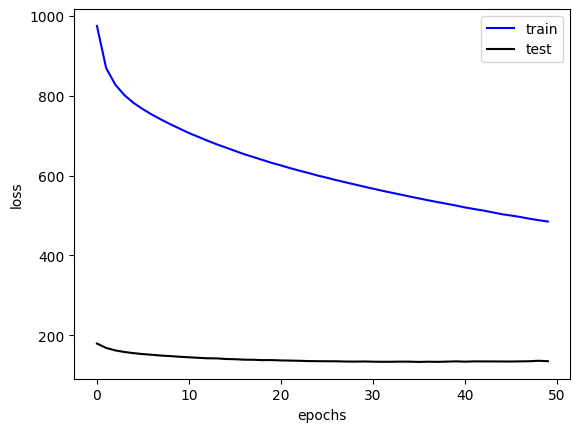

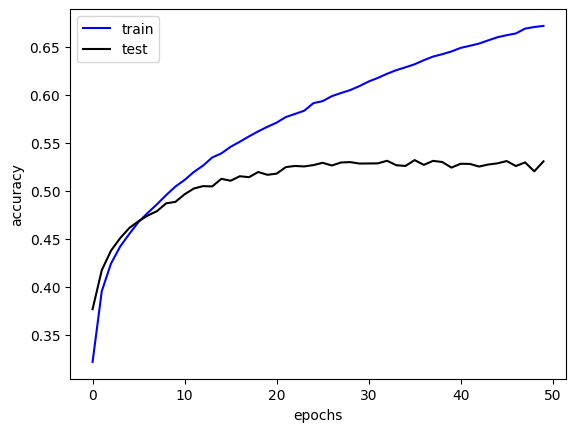

In [267]:
evaluate_history(history)

In [272]:
class CNN(torch.nn.Module):
    def __init__(self, n_output, n_hidden):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(3,32,3)
        self.conv2 = torch.nn.Conv2d(32,32,3)
        self.relu = torch.nn.ReLU(inplace = True)
        self.maxpool = torch.nn.MaxPool2d((2,2))
        self.flatten = torch.nn.Flatten()
        self.l1 = torch.nn.Linear(6272, n_hidden)
        self.l2 = torch.nn.Linear(n_hidden, n_output)
        
        self.features = torch.nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool
        )
        
        self.classifier = torch.nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )
    
    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [273]:
net = CNN(n_output, n_hidden)
print(net)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=6272, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=6272, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [275]:
summary(net, (100,3,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [100, 10]                 --
├─Sequential: 1-1                        [100, 32, 14, 14]         9,248
│    └─Conv2d: 2-1                       [100, 32, 30, 30]         896
├─Sequential: 1-4                        --                        (recursive)
│    └─ReLU: 2-2                         [100, 32, 30, 30]         --
├─Sequential: 1-5                        --                        (recursive)
│    └─Conv2d: 2-3                       [100, 32, 28, 28]         9,248
├─Sequential: 1-4                        --                        (recursive)
│    └─ReLU: 2-4                         [100, 32, 28, 28]         --
├─Sequential: 1-5                        --                        (recursive)
│    └─MaxPool2d: 2-5                    [100, 32, 14, 14]         --
├─Flatten: 1-6                           [100, 6272]               --
├─Sequential: 1-7                        [

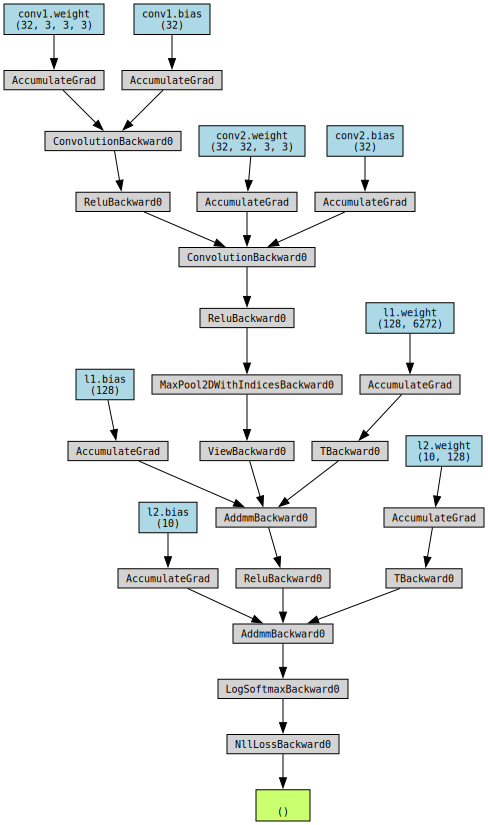

In [276]:
for images, labels in train_loader2 : 
    break
outputs = net(inputs)
loss = criterion(outputs,labels)
make_dot(loss,params = dict(net.named_parameters()))

9.10 결과
---------

In [277]:
torch_seed()
net = CNN(n_output, n_hidden).to(device)
criterion = torch.nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr = lr)
num_epochs = 50
history2 = np.zeros((0,5))

history2 = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history2)

100%|██████████| 500/500 [00:10<00:00, 48.69it/s]


Epoch [0/50], loss: 1041.22708, acc: 0.26100, val_loss: 186.59734, val_acc: 0.346700


100%|██████████| 500/500 [00:09<00:00, 54.15it/s]


Epoch [1/50], loss: 890.37766, acc: 0.37332, val_loss: 167.69884, val_acc: 0.409500


100%|██████████| 500/500 [00:09<00:00, 53.79it/s]


Epoch [2/50], loss: 806.55199, acc: 0.43084, val_loss: 153.01748, val_acc: 0.459600


100%|██████████| 500/500 [00:09<00:00, 53.94it/s]


Epoch [3/50], loss: 742.44211, acc: 0.47336, val_loss: 144.95479, val_acc: 0.488100


100%|██████████| 500/500 [00:09<00:00, 53.98it/s]


Epoch [4/50], loss: 703.94794, acc: 0.49988, val_loss: 136.92860, val_acc: 0.512800


100%|██████████| 500/500 [00:09<00:00, 54.41it/s]


Epoch [5/50], loss: 674.73439, acc: 0.52202, val_loss: 133.11608, val_acc: 0.526500


100%|██████████| 500/500 [00:09<00:00, 54.26it/s]


Epoch [6/50], loss: 651.52238, acc: 0.53766, val_loss: 129.18573, val_acc: 0.539900


100%|██████████| 500/500 [00:09<00:00, 54.16it/s]


Epoch [7/50], loss: 626.18694, acc: 0.55478, val_loss: 125.39830, val_acc: 0.554000


100%|██████████| 500/500 [00:09<00:00, 54.00it/s]


Epoch [8/50], loss: 602.26779, acc: 0.57394, val_loss: 123.58600, val_acc: 0.560500


100%|██████████| 500/500 [00:09<00:00, 54.06it/s]


Epoch [9/50], loss: 578.66451, acc: 0.59162, val_loss: 118.18671, val_acc: 0.583000


100%|██████████| 500/500 [00:09<00:00, 53.95it/s]


Epoch [10/50], loss: 557.91663, acc: 0.60876, val_loss: 116.24887, val_acc: 0.588500


100%|██████████| 500/500 [00:09<00:00, 54.13it/s]


Epoch [11/50], loss: 538.75002, acc: 0.62400, val_loss: 117.20812, val_acc: 0.583200


100%|██████████| 500/500 [00:09<00:00, 54.21it/s]


Epoch [12/50], loss: 518.05713, acc: 0.63648, val_loss: 111.37988, val_acc: 0.605400


100%|██████████| 500/500 [00:09<00:00, 53.93it/s]


Epoch [13/50], loss: 499.15788, acc: 0.65072, val_loss: 108.96464, val_acc: 0.611600


100%|██████████| 500/500 [00:09<00:00, 54.10it/s]


Epoch [14/50], loss: 480.01982, acc: 0.66420, val_loss: 111.19621, val_acc: 0.604500


100%|██████████| 500/500 [00:09<00:00, 54.19it/s]


Epoch [15/50], loss: 461.72060, acc: 0.67688, val_loss: 105.55967, val_acc: 0.631700


100%|██████████| 500/500 [00:09<00:00, 53.94it/s]


Epoch [16/50], loss: 441.53538, acc: 0.69196, val_loss: 106.28457, val_acc: 0.627400


100%|██████████| 500/500 [00:09<00:00, 54.51it/s]


Epoch [17/50], loss: 424.09794, acc: 0.70378, val_loss: 101.16969, val_acc: 0.644700


100%|██████████| 500/500 [00:09<00:00, 54.48it/s]


Epoch [18/50], loss: 404.74605, acc: 0.71832, val_loss: 102.23942, val_acc: 0.639800


100%|██████████| 500/500 [00:09<00:00, 55.33it/s]


Epoch [19/50], loss: 387.26231, acc: 0.73102, val_loss: 104.46484, val_acc: 0.636300


100%|██████████| 500/500 [00:08<00:00, 55.70it/s]


Epoch [20/50], loss: 370.33072, acc: 0.74102, val_loss: 99.94745, val_acc: 0.654000


100%|██████████| 500/500 [00:08<00:00, 55.80it/s]


Epoch [21/50], loss: 351.37414, acc: 0.75668, val_loss: 102.78904, val_acc: 0.651000


100%|██████████| 500/500 [00:09<00:00, 55.24it/s]


Epoch [22/50], loss: 338.03554, acc: 0.76700, val_loss: 99.80467, val_acc: 0.656600


100%|██████████| 500/500 [00:09<00:00, 55.15it/s]


Epoch [23/50], loss: 319.68511, acc: 0.77844, val_loss: 100.27145, val_acc: 0.660400


100%|██████████| 500/500 [00:08<00:00, 55.83it/s]


Epoch [24/50], loss: 302.68791, acc: 0.79306, val_loss: 99.75007, val_acc: 0.669100


100%|██████████| 500/500 [00:09<00:00, 54.65it/s]


Epoch [25/50], loss: 285.46024, acc: 0.80398, val_loss: 106.28287, val_acc: 0.642800


100%|██████████| 500/500 [00:09<00:00, 54.81it/s]


Epoch [26/50], loss: 270.44841, acc: 0.81438, val_loss: 106.76348, val_acc: 0.658900


100%|██████████| 500/500 [00:09<00:00, 55.45it/s]


Epoch [27/50], loss: 254.78252, acc: 0.82730, val_loss: 113.24391, val_acc: 0.637900


100%|██████████| 500/500 [00:08<00:00, 55.76it/s]


Epoch [28/50], loss: 237.58843, acc: 0.83946, val_loss: 105.30066, val_acc: 0.663000


100%|██████████| 500/500 [00:08<00:00, 56.21it/s]


Epoch [29/50], loss: 221.82161, acc: 0.85096, val_loss: 111.67091, val_acc: 0.654400


100%|██████████| 500/500 [00:09<00:00, 54.99it/s]


Epoch [30/50], loss: 205.16198, acc: 0.86222, val_loss: 108.90560, val_acc: 0.667500


100%|██████████| 500/500 [00:08<00:00, 55.59it/s]


Epoch [31/50], loss: 190.38002, acc: 0.87228, val_loss: 114.56943, val_acc: 0.652400


100%|██████████| 500/500 [00:08<00:00, 55.92it/s]


Epoch [32/50], loss: 176.69771, acc: 0.88250, val_loss: 112.80330, val_acc: 0.665800


100%|██████████| 500/500 [00:09<00:00, 55.10it/s]


Epoch [33/50], loss: 162.88545, acc: 0.89210, val_loss: 125.66653, val_acc: 0.648400


100%|██████████| 500/500 [00:09<00:00, 55.33it/s]


Epoch [34/50], loss: 147.10424, acc: 0.90528, val_loss: 126.52915, val_acc: 0.652000


100%|██████████| 500/500 [00:09<00:00, 55.19it/s]


Epoch [35/50], loss: 135.05905, acc: 0.91334, val_loss: 127.58132, val_acc: 0.653900


100%|██████████| 500/500 [00:09<00:00, 54.96it/s]


Epoch [36/50], loss: 119.46048, acc: 0.92650, val_loss: 127.17532, val_acc: 0.667100


100%|██████████| 500/500 [00:09<00:00, 55.28it/s]


Epoch [37/50], loss: 107.70814, acc: 0.93460, val_loss: 132.77099, val_acc: 0.662100


100%|██████████| 500/500 [00:08<00:00, 55.81it/s]


Epoch [38/50], loss: 96.18872, acc: 0.94158, val_loss: 138.52061, val_acc: 0.658800


100%|██████████| 500/500 [00:09<00:00, 54.96it/s]


Epoch [39/50], loss: 87.10231, acc: 0.95072, val_loss: 143.70247, val_acc: 0.657900


100%|██████████| 500/500 [00:09<00:00, 54.58it/s]


Epoch [40/50], loss: 74.90564, acc: 0.95908, val_loss: 151.86307, val_acc: 0.654500


100%|██████████| 500/500 [00:08<00:00, 55.56it/s]


Epoch [41/50], loss: 67.72022, acc: 0.96518, val_loss: 155.36862, val_acc: 0.649400


100%|██████████| 500/500 [00:08<00:00, 55.61it/s]


Epoch [42/50], loss: 53.81604, acc: 0.97412, val_loss: 171.29252, val_acc: 0.637500


100%|██████████| 500/500 [00:09<00:00, 55.18it/s]


Epoch [43/50], loss: 49.20457, acc: 0.97764, val_loss: 159.78854, val_acc: 0.659500


100%|██████████| 500/500 [00:08<00:00, 55.61it/s]


Epoch [44/50], loss: 40.65093, acc: 0.98310, val_loss: 163.92609, val_acc: 0.657400


100%|██████████| 500/500 [00:09<00:00, 54.37it/s]


Epoch [45/50], loss: 37.77783, acc: 0.98640, val_loss: 168.72523, val_acc: 0.657000


100%|██████████| 500/500 [00:09<00:00, 54.73it/s]


Epoch [46/50], loss: 23.13844, acc: 0.99436, val_loss: 173.53307, val_acc: 0.664300


100%|██████████| 500/500 [00:09<00:00, 54.25it/s]


Epoch [47/50], loss: 17.91663, acc: 0.99664, val_loss: 178.59237, val_acc: 0.661900


100%|██████████| 500/500 [00:09<00:00, 55.55it/s]


Epoch [48/50], loss: 14.22920, acc: 0.99818, val_loss: 185.76134, val_acc: 0.660200


100%|██████████| 500/500 [00:09<00:00, 54.33it/s]


Epoch [49/50], loss: 12.30056, acc: 0.99838, val_loss: 189.54907, val_acc: 0.663200


initial state : loss = 186.59734, acc = 0.34670
final state : loss = 189.54907, acc = 0.66320


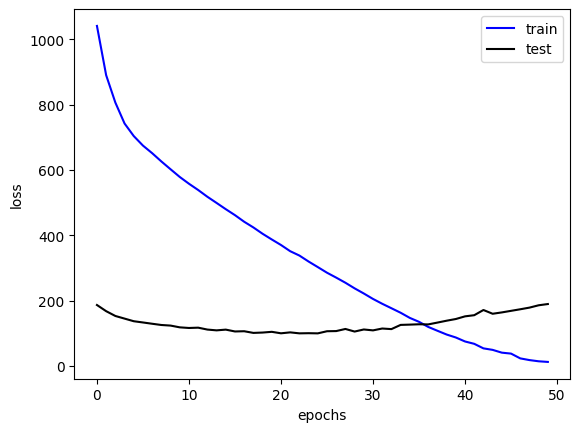

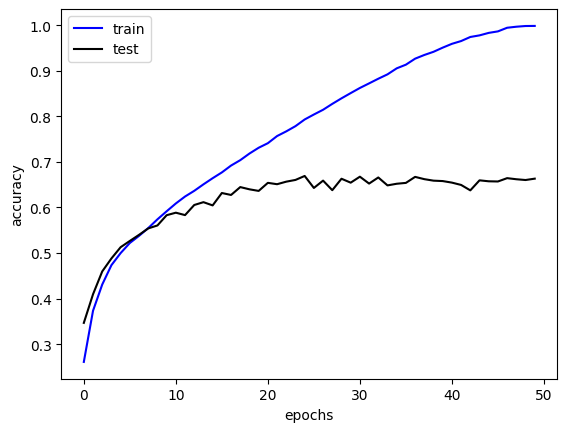

In [279]:
evaluate_history(history2)

CH.10 튜닝 기법
===========

10.4 과학습의 대응방법
------------------

In [12]:
torch.manual_seed(123)
inputs = torch.randn(1,10)
print(inputs)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])


In [14]:
dropout = torch.nn.Dropout(0.5) # 0.5 is not a ratio, just the probability to drop out the elements

dropout.train()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

dropout.eval()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

True
tensor([[-0.2229,  0.0000, -0.0000, -0.4808, -0.0000,  0.4185, -0.0000, -1.5101,
          0.0000, -0.2170]])
False
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])
